# Cell 1: Environment Setup & Initial Data Exploration

In [1]:
# Cell 1: Environment Setup & Initial Data Exploration
import os
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Define base path (adjust if needed for Kaggle)
BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

# Check directory structure
print("=" * 60)
print("DIRECTORY STRUCTURE EXPLORATION")
print("=" * 60)

def explore_directory(path, indent=0):
    """Recursively explore directory structure (limited depth)"""
    items = []
    try:
        for item in sorted(os.listdir(path))[:10]:  # Limit to first 10 items
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                items.append(f"{'  ' * indent}📁 {item}/")
                if indent < 2:  # Limit depth
                    items.extend(explore_directory(item_path, indent + 1))
            else:
                size = os.path.getsize(item_path)
                items.append(f"{'  ' * indent}📄 {item} ({size/1024:.1f} KB)")
        
        total_items = len(os.listdir(path))
        if total_items > 10:
            items.append(f"{'  ' * indent}... and {total_items - 10} more items")
    except Exception as e:
        items.append(f"{'  ' * indent}Error: {e}")
    return items

# Explore main directory
print("\n📂 Main Directory Structure:")
for line in explore_directory(BASE_PATH):
    print(line)

# Check CSV files
print("\n" + "=" * 60)
print("CSV FILES EXPLORATION")
print("=" * 60)

# Load test.csv
test_csv_path = os.path.join(BASE_PATH, 'test.csv')
if os.path.exists(test_csv_path):
    test_df = pd.read_csv(test_csv_path)
    print(f"\n📄 test.csv:")
    print(f"   Shape: {test_df.shape}")
    print(f"   Columns: {test_df.columns.tolist()}")
    print(f"\n   First 5 rows:")
    print(test_df.head().to_string())
    print(f"\n   Data types:\n{test_df.dtypes}")

# Load sample_submission.csv
submission_path = os.path.join(BASE_PATH, 'sample_submission.csv')
if os.path.exists(submission_path):
    submission_df = pd.read_csv(submission_path)
    print(f"\n📄 sample_submission.csv:")
    print(f"   Shape: {submission_df.shape}")
    print(f"   Columns: {submission_df.columns.tolist()}")
    print(f"\n   First 5 rows:")
    print(submission_df.head().to_string())
    print(f"\n   Unique genres in sample: {submission_df['genre'].unique()}")

# Count files in key directories
print("\n" + "=" * 60)
print("FILE COUNTS")
print("=" * 60)

# Genres stems
genres_path = os.path.join(BASE_PATH, 'genres_stems')
if os.path.exists(genres_path):
    print(f"\n📁 genres_stems/:")
    genres = sorted(os.listdir(genres_path))
    print(f"   Genres found: {genres}")
    
    for genre in genres:
        genre_path = os.path.join(genres_path, genre)
        if os.path.isdir(genre_path):
            songs = os.listdir(genre_path)
            print(f"   {genre}: {len(songs)} songs")
            
            # Check first song's stems
            if songs:
                first_song_path = os.path.join(genre_path, songs[0])
                if os.path.isdir(first_song_path):
                    stems = os.listdir(first_song_path)
                    print(f"      └── Sample stems: {stems}")

# Mashups (test data)
mashups_path = os.path.join(BASE_PATH, 'mashups')
if os.path.exists(mashups_path):
    mashup_files = os.listdir(mashups_path)
    print(f"\n📁 mashups/: {len(mashup_files)} files")
    print(f"   Sample files: {sorted(mashup_files)[:5]}")

# ESC-50 noise data
esc_path = os.path.join(BASE_PATH, 'ESC-50-master')
if os.path.exists(esc_path):
    print(f"\n📁 ESC-50-master/:")
    for item in os.listdir(esc_path):
        item_path = os.path.join(esc_path, item)
        if os.path.isdir(item_path):
            print(f"   📁 {item}/: {len(os.listdir(item_path))} files")
        else:
            print(f"   📄 {item}")

print("\n" + "=" * 60)
print("EXPLORATION COMPLETE")
print("=" * 60)

DIRECTORY STRUCTURE EXPLORATION

📂 Main Directory Structure:
📁 ESC-50-master/
  📄 LICENSE (277.9 KB)
  📄 README.md (29.8 KB)
  📁 audio/
    📄 1-100032-A-0.wav (430.7 KB)
    📄 1-100038-A-14.wav (430.7 KB)
    📄 1-100210-A-36.wav (430.7 KB)
    📄 1-100210-B-36.wav (430.7 KB)
    📄 1-101296-A-19.wav (430.7 KB)
    📄 1-101296-B-19.wav (430.7 KB)
    📄 1-101336-A-30.wav (430.7 KB)
    📄 1-101404-A-34.wav (430.7 KB)
    📄 1-103298-A-9.wav (430.7 KB)
    📄 1-103995-A-30.wav (430.7 KB)
    ... and 1990 more items
  📁 meta/
    📄 esc50-human.xlsx (533.7 KB)
    📄 esc50.csv (91.5 KB)
📁 genres_stems/
  📁 blues/
    📁 blues.00000/
    📁 blues.00001/
    📁 blues.00002/
    📁 blues.00003/
    📁 blues.00004/
    📁 blues.00005/
    📁 blues.00006/
    📁 blues.00007/
    📁 blues.00008/
    📁 blues.00009/
    ... and 90 more items
  📁 classical/
    📁 classical.00000/
    📁 classical.00001/
    📁 classical.00002/
    📁 classical.00003/
    📁 classical.00004/
    📁 classical.00005/
    📁 classical.00006/

# Cell 2: Deep Audio Analysis

AUDIO PROPERTIES ANALYSIS

📊 TRAINING DATA (Genre Stems) Analysis:
--------------------------------------------------

Sampled 24 training stems:
  Sample rates: {44100}
  Durations: min=30.01s, max=30.08s
  Channels: {2}

Detailed breakdown:
  blues/blues.00000/drums.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/vocals.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/bass.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/other.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/drums.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/vocals.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/bass.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/other.wav: 30.01s, 44100Hz, 2ch

📊 TEST DATA (Mashups) Analysis:
--------------------------------------------------

Sampling test mashups...
  song0001.wav: 30.00s, 22050Hz, 1ch
  song0002.wav: 22.34s, 22050Hz, 1ch
  song0101.wav: 29.86s, 22050Hz, 1ch
  song0501.wav: 30.01s, 22050Hz, 1ch
  song1001.wav: 19.27s, 22050Hz, 1ch
  song1501.wav: 30.00s, 22050Hz, 1ch
  song200

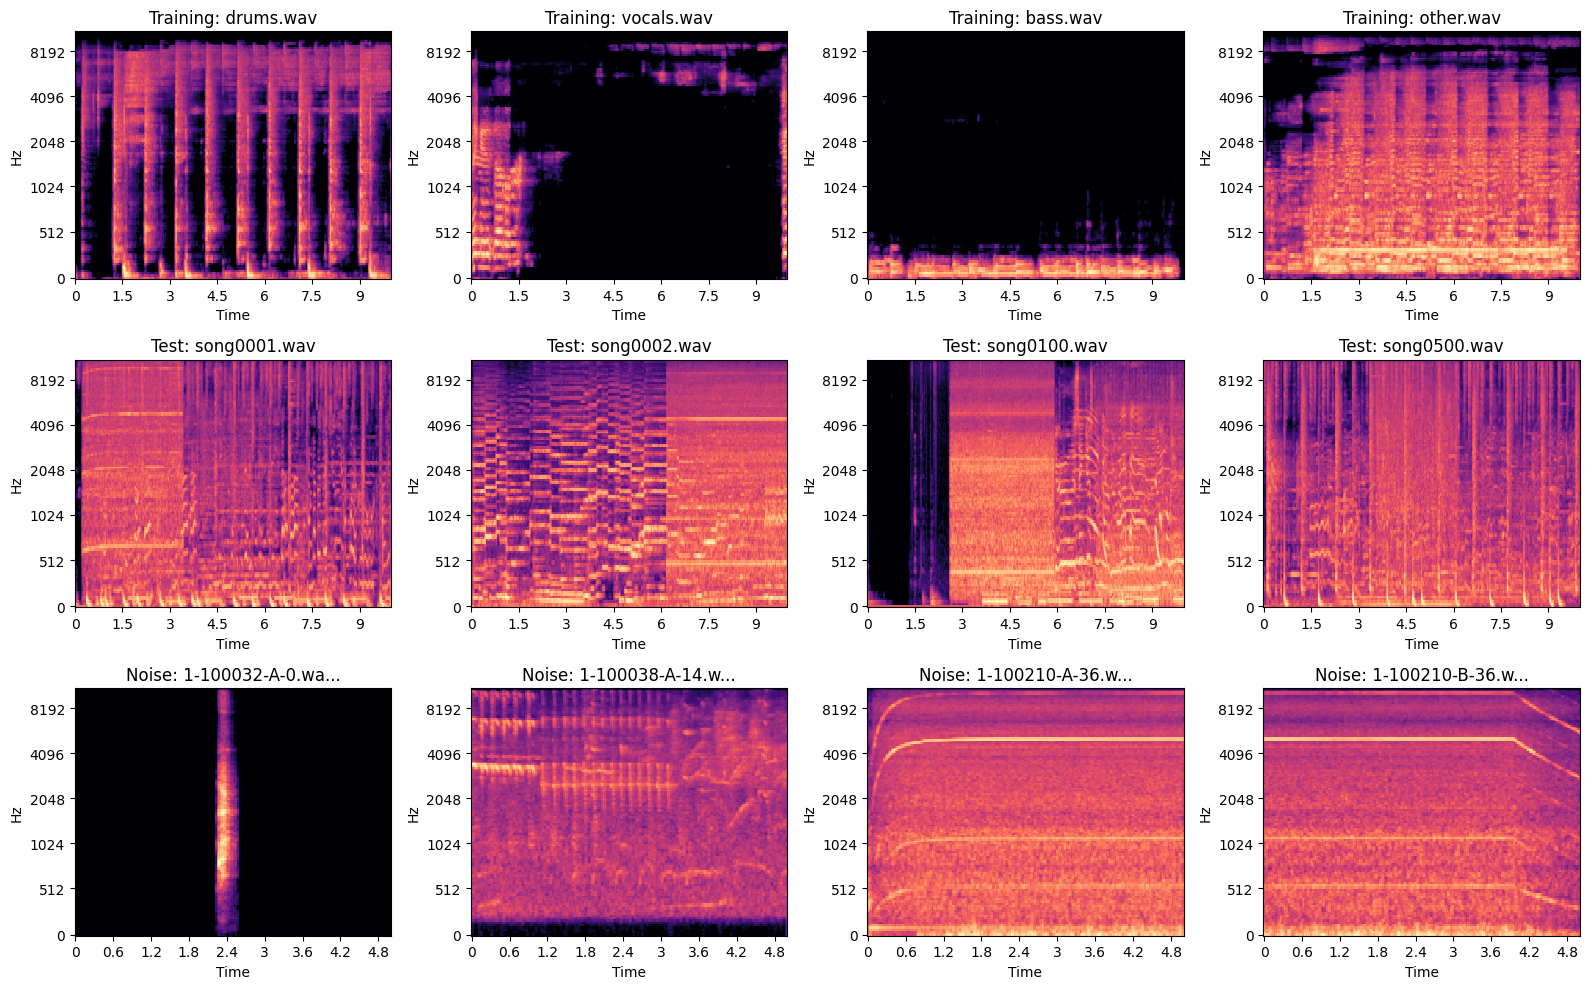


✅ Spectrogram visualization saved!

📊 AUDIO FEATURE COMPARISON
--------------------------------------------------

Comparing audio features between datasets...

Feature comparison (Training combined vs Test mashup):
Feature                            Training         Test      Ratio
------------------------------------------------------------------
rms_mean                             0.1244       0.1306       1.05
zcr_mean                             0.0801       0.1691       2.11
spectral_centroid_mean            1782.7412    3489.2452       1.96
mfcc_0_mean                       -125.2663     -93.7755       0.75
mfcc_1_mean                        120.2194      55.0205       0.46

AUDIO ANALYSIS COMPLETE


In [2]:
# Cell 2: Deep Audio Analysis
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("AUDIO PROPERTIES ANALYSIS")
print("=" * 60)

# Function to get audio info without loading full audio
def get_audio_info(file_path):
    """Get audio properties"""
    try:
        y, sr = librosa.load(file_path, sr=None, mono=False)
        duration = librosa.get_duration(y=y, sr=sr)
        if len(y.shape) == 1:
            channels = 1
        else:
            channels = y.shape[0]
        return {
            'sample_rate': sr,
            'duration': duration,
            'channels': channels,
            'samples': y.shape[-1]
        }
    except Exception as e:
        return {'error': str(e)}

# 1. Analyze TRAINING stems (sample from each genre)
print("\n📊 TRAINING DATA (Genre Stems) Analysis:")
print("-" * 50)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
genres = sorted(os.listdir(genres_path))

stem_types = ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']
training_stats = defaultdict(list)

for genre in genres[:3]:  # Sample 3 genres for speed
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))[:2]  # First 2 songs per genre
    
    for song in songs:
        song_path = os.path.join(genre_path, song)
        for stem in stem_types:
            stem_path = os.path.join(song_path, stem)
            if os.path.exists(stem_path):
                info = get_audio_info(stem_path)
                if 'error' not in info:
                    training_stats['genre'].append(genre)
                    training_stats['song'].append(song)
                    training_stats['stem'].append(stem)
                    training_stats['sample_rate'].append(info['sample_rate'])
                    training_stats['duration'].append(info['duration'])
                    training_stats['channels'].append(info['channels'])

# Display training stats
print(f"\nSampled {len(training_stats['duration'])} training stems:")
print(f"  Sample rates: {set(training_stats['sample_rate'])}")
print(f"  Durations: min={min(training_stats['duration']):.2f}s, max={max(training_stats['duration']):.2f}s")
print(f"  Channels: {set(training_stats['channels'])}")

# Show detailed breakdown
print("\nDetailed breakdown:")
for i in range(min(8, len(training_stats['duration']))):
    print(f"  {training_stats['genre'][i]}/{training_stats['song'][i]}/{training_stats['stem'][i]}: "
          f"{training_stats['duration'][i]:.2f}s, {training_stats['sample_rate'][i]}Hz, "
          f"{training_stats['channels'][i]}ch")

# 2. Analyze TEST mashups
print("\n" + "=" * 60)
print("📊 TEST DATA (Mashups) Analysis:")
print("-" * 50)

mashups_path = os.path.join(BASE_PATH, 'mashups')
mashup_files = sorted(os.listdir(mashups_path))

# Sample multiple test files across the range
sample_indices = [0, 1, 100, 500, 1000, 1500, 2000, 2500, 3000, len(mashup_files)-1]
sample_indices = [i for i in sample_indices if i < len(mashup_files)]

test_stats = defaultdict(list)

print("\nSampling test mashups...")
for idx in sample_indices:
    file_path = os.path.join(mashups_path, mashup_files[idx])
    info = get_audio_info(file_path)
    if 'error' not in info:
        test_stats['filename'].append(mashup_files[idx])
        test_stats['sample_rate'].append(info['sample_rate'])
        test_stats['duration'].append(info['duration'])
        test_stats['channels'].append(info['channels'])
        print(f"  {mashup_files[idx]}: {info['duration']:.2f}s, {info['sample_rate']}Hz, {info['channels']}ch")

print(f"\nTest mashups summary:")
print(f"  Sample rates: {set(test_stats['sample_rate'])}")
print(f"  Duration range: {min(test_stats['duration']):.2f}s - {max(test_stats['duration']):.2f}s")
print(f"  Channels: {set(test_stats['channels'])}")

# 3. Analyze ESC-50 Noise Data
print("\n" + "=" * 60)
print("📊 NOISE DATA (ESC-50) Analysis:")
print("-" * 50)

esc_audio_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')
esc_files = sorted(os.listdir(esc_audio_path))[:5]

for f in esc_files:
    file_path = os.path.join(esc_audio_path, f)
    info = get_audio_info(file_path)
    if 'error' not in info:
        print(f"  {f}: {info['duration']:.2f}s, {info['sample_rate']}Hz, {info['channels']}ch")

# Load ESC-50 metadata
esc_meta_path = os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv')
if os.path.exists(esc_meta_path):
    import pandas as pd
    esc_meta = pd.read_csv(esc_meta_path)
    print(f"\nESC-50 metadata:")
    print(f"  Shape: {esc_meta.shape}")
    print(f"  Columns: {esc_meta.columns.tolist()}")
    print(f"  Categories: {esc_meta['category'].nunique()} unique")
    print(f"\n  Category distribution:")
    print(esc_meta['category'].value_counts().head(10))

# 4. Visualize sample spectrograms
print("\n" + "=" * 60)
print("📊 SPECTROGRAM VISUALIZATION")
print("-" * 50)

fig, axes = plt.subplots(3, 4, figsize=(16, 10))

# Row 1: Training stems from one song
sample_genre = 'rock'
sample_song = 'rock.00000'
song_path = os.path.join(genres_path, sample_genre, sample_song)

for idx, stem in enumerate(stem_types):
    stem_path = os.path.join(song_path, stem)
    y, sr = librosa.load(stem_path, sr=22050, duration=10)  # First 10 seconds
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[0, idx])
    axes[0, idx].set_title(f'Training: {stem}')

# Row 2: Test mashups (different ones)
test_samples = ['song0001.wav', 'song0002.wav', 'song0100.wav', 'song0500.wav']
for idx, mashup in enumerate(test_samples):
    mashup_path = os.path.join(mashups_path, mashup)
    y, sr = librosa.load(mashup_path, sr=22050, duration=10)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[1, idx])
    axes[1, idx].set_title(f'Test: {mashup}')

# Row 3: ESC-50 noise samples
noise_samples = esc_files[:4]
for idx, noise_file in enumerate(noise_samples):
    noise_path = os.path.join(esc_audio_path, noise_file)
    y, sr = librosa.load(noise_path, sr=22050)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[2, idx])
    axes[2, idx].set_title(f'Noise: {noise_file[:15]}...')

plt.tight_layout()
plt.savefig('spectrograms_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Spectrogram visualization saved!")

# 5. Feature comparison
print("\n" + "=" * 60)
print("📊 AUDIO FEATURE COMPARISON")
print("-" * 50)

def extract_features(file_path, duration=10):
    """Extract key audio features"""
    y, sr = librosa.load(file_path, sr=22050, duration=duration)
    
    features = {
        'rms_mean': np.mean(librosa.feature.rms(y=y)),
        'rms_std': np.std(librosa.feature.rms(y=y)),
        'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
    }
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
    
    return features

# Compare features between training and test
print("\nComparing audio features between datasets...")

# Sample training (combined stems)
train_sample_path = os.path.join(genres_path, 'blues', 'blues.00000')
train_combined = None
for stem in stem_types:
    y, sr = librosa.load(os.path.join(train_sample_path, stem), sr=22050, duration=10)
    if train_combined is None:
        train_combined = y
    else:
        # Make same length
        min_len = min(len(train_combined), len(y))
        train_combined = train_combined[:min_len] + y[:min_len]

# Save combined for feature extraction
import soundfile as sf
sf.write('/tmp/train_combined.wav', train_combined, 22050)
train_features = extract_features('/tmp/train_combined.wav')

# Test sample
test_features = extract_features(os.path.join(mashups_path, 'song0001.wav'))

print("\nFeature comparison (Training combined vs Test mashup):")
print(f"{'Feature':<30} {'Training':>12} {'Test':>12} {'Ratio':>10}")
print("-" * 66)
for key in ['rms_mean', 'zcr_mean', 'spectral_centroid_mean', 'mfcc_0_mean', 'mfcc_1_mean']:
    if key in train_features and key in test_features:
        ratio = test_features[key] / (train_features[key] + 1e-10)
        print(f"{key:<30} {train_features[key]:>12.4f} {test_features[key]:>12.4f} {ratio:>10.2f}")

print("\n" + "=" * 60)
print("AUDIO ANALYSIS COMPLETE")
print("=" * 60)

# Cell 3: Comprehensive Duration & Genre Analysis

COMPREHENSIVE TEST DURATION ANALYSIS

File size analysis (proxy for duration):
  Total files: 3020
  Size range: 261.0 KB - 1317.0 KB
  Mean size: 1234.0 KB
  Std size: 162.5 KB

Estimated duration distribution:
  Min: 6.06s
  Max: 30.58s
  Mean: 28.65s
  Median: 29.95s

VERIFYING DURATION ESTIMATES (sampling 50 files)


Loading samples: 100%|██████████| 50/50 [00:01<00:00, 46.91it/s]



Verification - Actual vs Estimated:
  Correlation: 1.0000
  Actual range: 15.56s - 30.24s


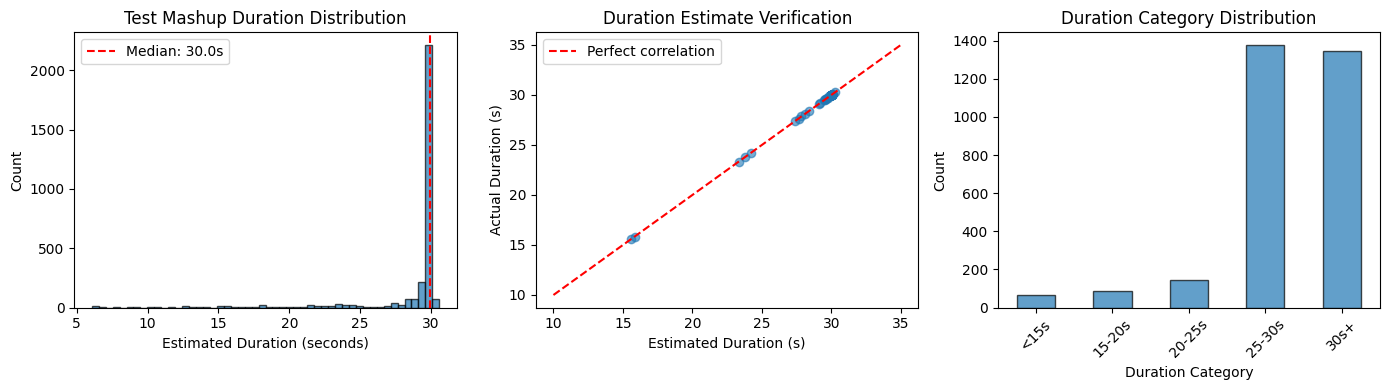


Duration category breakdown:
<15s        67
15-20s      85
20-25s     145
25-30s    1375
30s+      1348
Name: count, dtype: int64

GENRE-SPECIFIC FEATURE PROFILING

Extracting genre features (3 songs per genre)...


Processing genres: 100%|██████████| 10/10 [00:36<00:00,  3.61s/it]



Genre feature DataFrame shape: (30, 53)


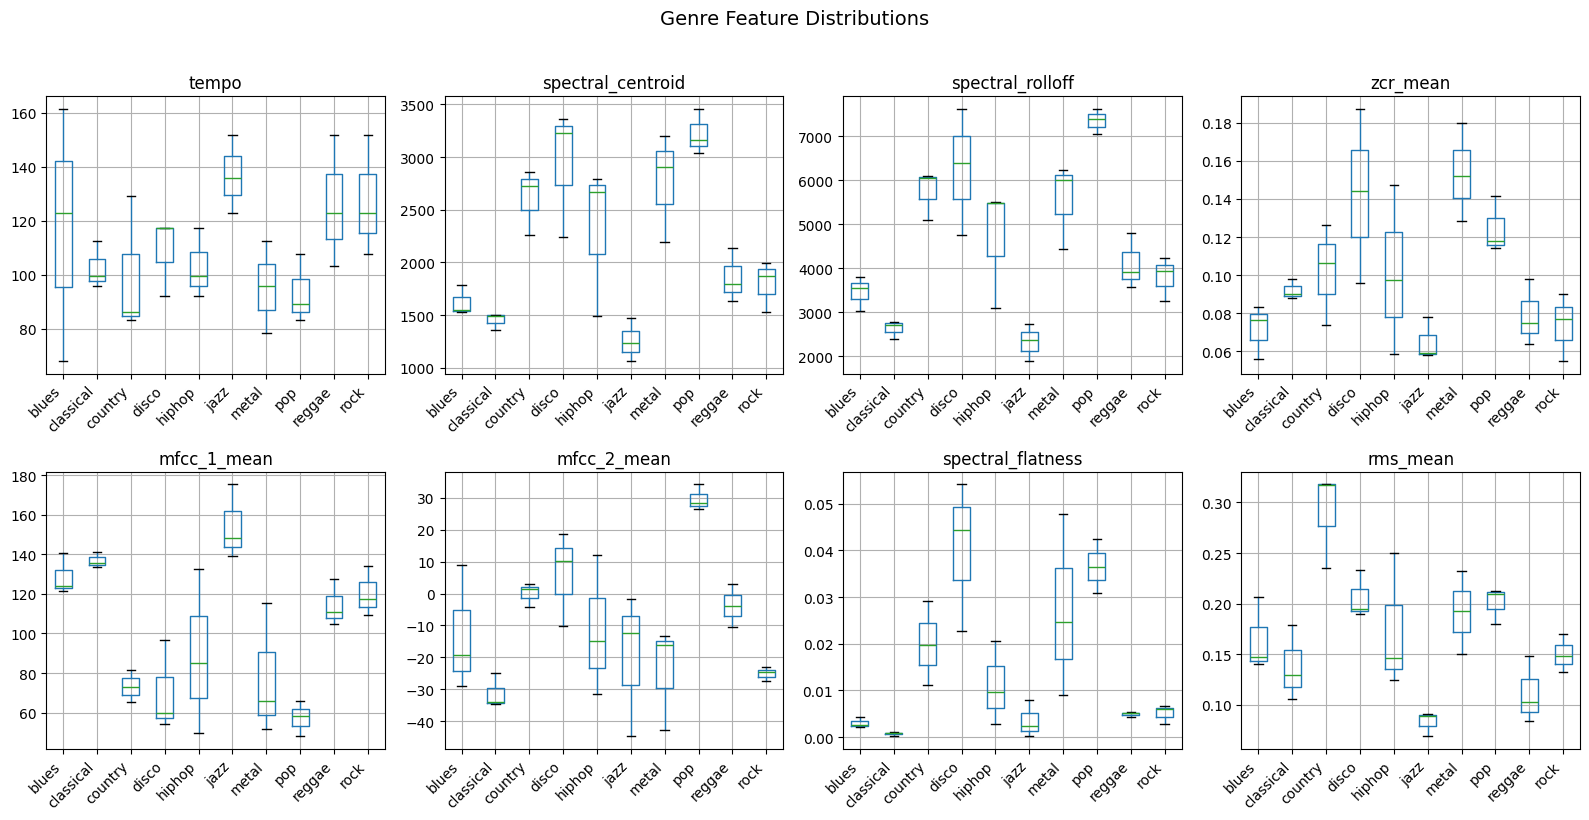


KEY DISTINGUISHING FEATURES BY GENRE

Mean values by genre:
                          tempo  spectral_centroid  zcr_mean  mfcc_1_mean
genre                                                                    
blues      [117.51516241776316]            1622.19      0.07   128.679993
classical  [102.47809538740245]            1451.68      0.09   136.809998
country     [99.56212197580646]            2617.56      0.10    73.320000
disco      [109.06427556818183]            2941.54      0.14    70.239998
hiphop     [103.04100196678321]            2317.37      0.10    89.080002
jazz       [137.01504450464395]            1256.78      0.07   154.250000
metal       [95.45094285243742]            2768.16      0.15    77.629997
pop         [93.37441992839267]            3219.19      0.12    57.310001
reggae     [126.13511029411764]            1856.30      0.08   114.400002
rock       [127.57065716911764]            1799.44      0.07   120.339996

TEMPO ANALYSIS (Critical for Mashup Understanding)

In [3]:
# Cell 3: Comprehensive Duration Analysis & Genre Feature Profiling
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
from tqdm import tqdm

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("COMPREHENSIVE TEST DURATION ANALYSIS")
print("=" * 60)

# Analyze ALL test file durations (quick method using file size as proxy first)
mashups_path = os.path.join(BASE_PATH, 'mashups')
mashup_files = sorted(os.listdir(mashups_path))

# Get file sizes (fast)
file_sizes = []
for f in mashup_files:
    size = os.path.getsize(os.path.join(mashups_path, f))
    file_sizes.append(size)

file_sizes = np.array(file_sizes)
print(f"\nFile size analysis (proxy for duration):")
print(f"  Total files: {len(file_sizes)}")
print(f"  Size range: {file_sizes.min()/1024:.1f} KB - {file_sizes.max()/1024:.1f} KB")
print(f"  Mean size: {file_sizes.mean()/1024:.1f} KB")
print(f"  Std size: {file_sizes.std()/1024:.1f} KB")

# Size to duration estimate (22050 Hz, mono, 16-bit = 44100 bytes/sec)
bytes_per_sec = 22050 * 2  # 16-bit mono
estimated_durations = file_sizes / bytes_per_sec

print(f"\nEstimated duration distribution:")
print(f"  Min: {estimated_durations.min():.2f}s")
print(f"  Max: {estimated_durations.max():.2f}s")
print(f"  Mean: {estimated_durations.mean():.2f}s")
print(f"  Median: {np.median(estimated_durations):.2f}s")

# Duration histogram
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.hist(estimated_durations, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Estimated Duration (seconds)')
plt.ylabel('Count')
plt.title('Test Mashup Duration Distribution')
plt.axvline(x=np.median(estimated_durations), color='r', linestyle='--', label=f'Median: {np.median(estimated_durations):.1f}s')
plt.legend()

# Verify with actual loading for a sample
print("\n" + "=" * 60)
print("VERIFYING DURATION ESTIMATES (sampling 50 files)")
print("=" * 60)

sample_indices = np.linspace(0, len(mashup_files)-1, 50, dtype=int)
actual_durations = []
for idx in tqdm(sample_indices, desc="Loading samples"):
    y, sr = librosa.load(os.path.join(mashups_path, mashup_files[idx]), sr=None)
    actual_durations.append(len(y) / sr)

actual_durations = np.array(actual_durations)
estimated_sample = estimated_durations[sample_indices]

print(f"\nVerification - Actual vs Estimated:")
print(f"  Correlation: {np.corrcoef(actual_durations, estimated_sample)[0,1]:.4f}")
print(f"  Actual range: {actual_durations.min():.2f}s - {actual_durations.max():.2f}s")

plt.subplot(1, 3, 2)
plt.scatter(estimated_sample, actual_durations, alpha=0.6)
plt.plot([10, 35], [10, 35], 'r--', label='Perfect correlation')
plt.xlabel('Estimated Duration (s)')
plt.ylabel('Actual Duration (s)')
plt.title('Duration Estimate Verification')
plt.legend()

# Duration categories
duration_bins = [0, 15, 20, 25, 30, 35]
duration_labels = ['<15s', '15-20s', '20-25s', '25-30s', '30s+']
duration_cats = pd.cut(estimated_durations, bins=duration_bins, labels=duration_labels)

plt.subplot(1, 3, 3)
duration_cats.value_counts().sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('duration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nDuration category breakdown:")
print(duration_cats.value_counts().sort_index())

# ============================================================
# GENRE-SPECIFIC FEATURE ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("GENRE-SPECIFIC FEATURE PROFILING")
print("=" * 60)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
genres = sorted(os.listdir(genres_path))

def extract_genre_features(audio_path, sr=22050, duration=30):
    """Extract comprehensive features from audio"""
    y, _ = librosa.load(audio_path, sr=sr, mono=True, duration=duration)
    
    features = {}
    
    # Temporal features
    features['rms_mean'] = np.mean(librosa.feature.rms(y=y))
    features['rms_std'] = np.std(librosa.feature.rms(y=y))
    features['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(y))
    features['zcr_std'] = np.std(librosa.feature.zero_crossing_rate(y))
    
    # Spectral features
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features['spectral_contrast'] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    features['spectral_flatness'] = np.mean(librosa.feature.spectral_flatness(y=y))
    
    # Rhythm features
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['tempo'] = tempo
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
        features[f'mfcc_{i}_std'] = np.std(mfccs[i])
    
    # Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features['chroma_mean'] = np.mean(chroma)
    features['chroma_std'] = np.std(chroma)
    
    return features

# Extract features for each genre (combined stems)
print("\nExtracting genre features (3 songs per genre)...")
genre_features = defaultdict(list)

for genre in tqdm(genres, desc="Processing genres"):
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))[:3]  # 3 songs per genre
    
    for song in songs:
        song_path = os.path.join(genre_path, song)
        
        # Load and combine all stems
        combined = None
        for stem in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
            stem_path = os.path.join(song_path, stem)
            y, sr = librosa.load(stem_path, sr=22050, mono=True, duration=30)
            if combined is None:
                combined = y
            else:
                min_len = min(len(combined), len(y))
                combined = combined[:min_len] + y[:min_len]
        
        # Normalize
        combined = combined / (np.max(np.abs(combined)) + 1e-8)
        
        # Extract features
        import tempfile
        import soundfile as sf
        with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp:
            sf.write(tmp.name, combined, 22050)
            features = extract_genre_features(tmp.name)
            features['genre'] = genre
            genre_features['data'].append(features)
            os.unlink(tmp.name)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_features['data'])
print(f"\nGenre feature DataFrame shape: {genre_df.shape}")

# Visualize key distinguishing features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

key_features = ['tempo', 'spectral_centroid', 'spectral_rolloff', 'zcr_mean',
                'mfcc_1_mean', 'mfcc_2_mean', 'spectral_flatness', 'rms_mean']

for idx, feature in enumerate(key_features):
    ax = axes[idx // 4, idx % 4]
    genre_df.boxplot(column=feature, by='genre', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.suptitle('Genre Feature Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('genre_features.png', dpi=150, bbox_inches='tight')
plt.show()

# Print feature statistics per genre
print("\n" + "=" * 60)
print("KEY DISTINGUISHING FEATURES BY GENRE")
print("=" * 60)

summary_features = ['tempo', 'spectral_centroid', 'zcr_mean', 'mfcc_1_mean']
genre_summary = genre_df.groupby('genre')[summary_features].mean()
print("\nMean values by genre:")
print(genre_summary.round(2).to_string())

# Tempo analysis (important for mashup tempo adjustment understanding)
print("\n" + "=" * 60)
print("TEMPO ANALYSIS (Critical for Mashup Understanding)")
print("=" * 60)
tempo_by_genre = genre_df.groupby('genre')['tempo'].agg(['mean', 'std', 'min', 'max'])
print(tempo_by_genre.round(1).to_string())

print("\n✅ Genre analysis complete!")

# Cell 4: Synthetic Mashup Generation & Domain Gap Analysis

SYNTHETIC MASHUP GENERATION EXPERIMENT

ESC-50 categories:
['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']

GENERATING SYNTHETIC MASHUPS FOR COMPARISON

Generating synthetic mashup for rock...
  Stems used: ['rock.00081/drums.wav', 'rock.00014/vocals.wav', 'rock.00003/bass.wav', 'rock.00094/other.wav']
  Noise added: ['4-126532-A-18.wav @ 0.04', '1-17150-A-12.wav @ 0.04', '3-246513-A-16.wav @ 0.12']
  Duration: 28.99s

Generating sy

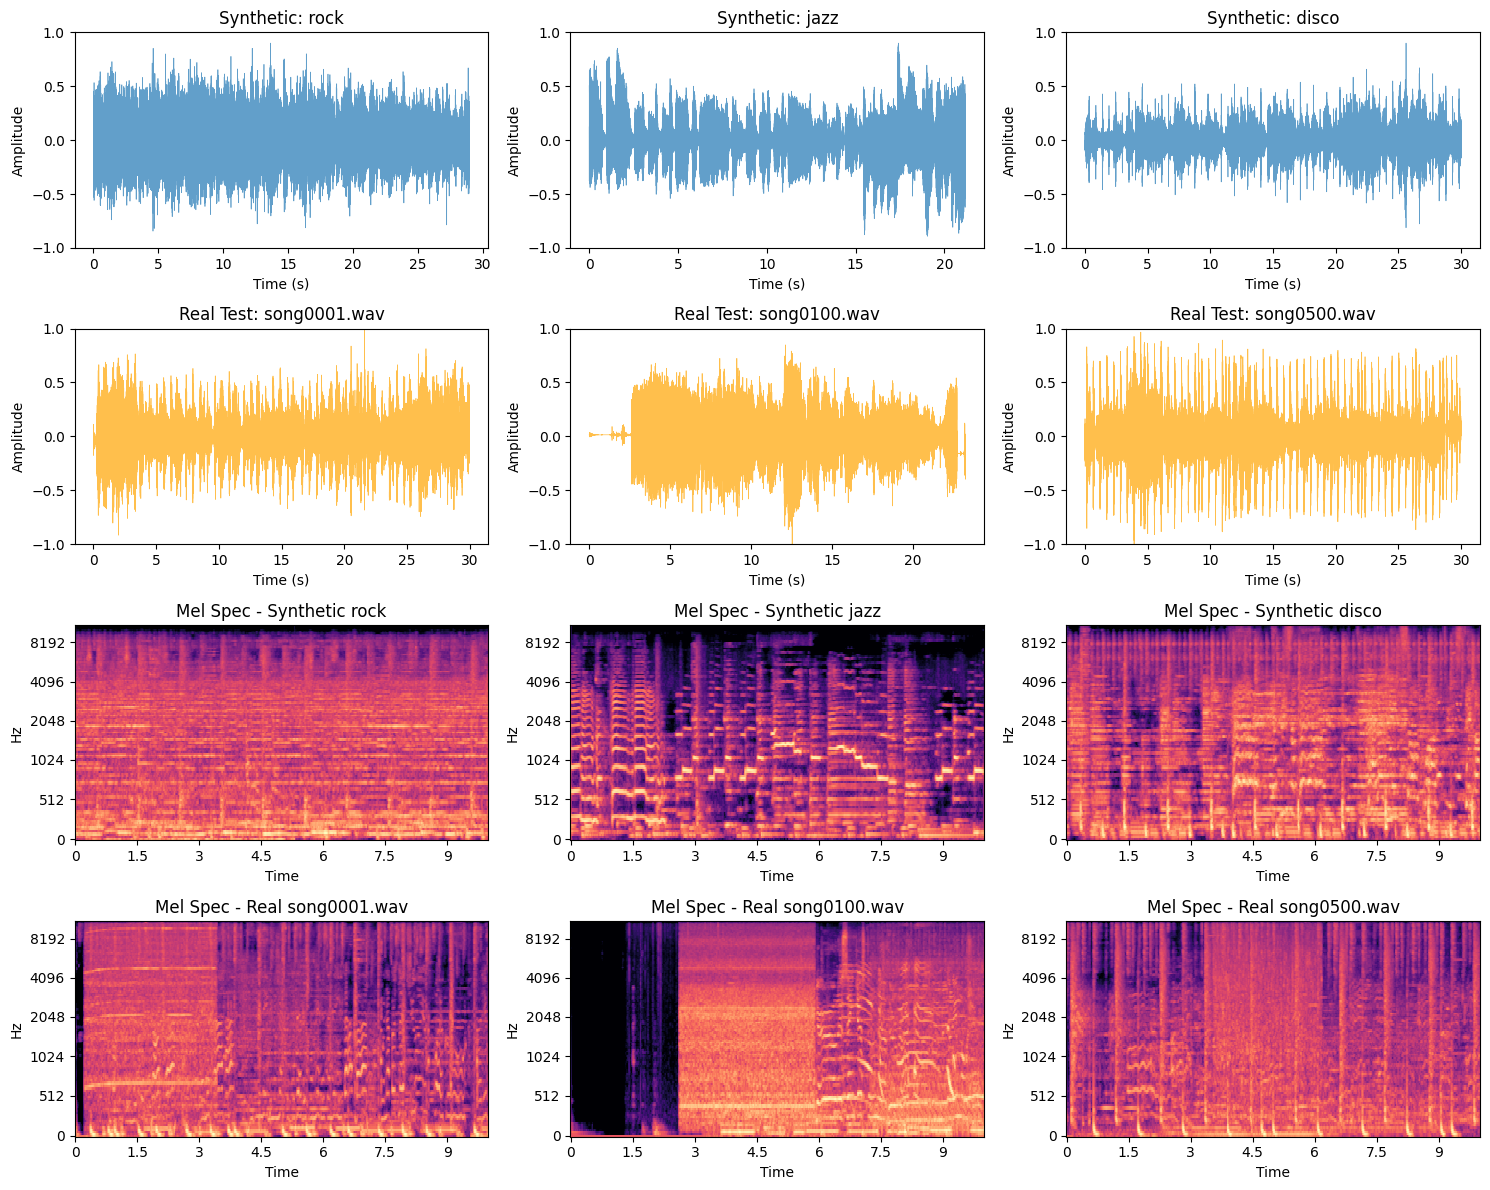


FEATURE COMPARISON: SYNTHETIC vs REAL TEST

Feature comparison:
                   rms_mean  zcr_mean  spectral_centroid  spectral_bandwidth  spectral_rolloff  spectral_flatness
source                                                                                                           
synthetic_rock       0.1551    0.1231          2251.8749           2031.9667         4412.6947             0.0061
synthetic_jazz       0.1325    0.0893          1578.0942           1522.5432         2812.6892             0.0011
synthetic_disco      0.0782    0.1821          2920.2387           2475.4216         5874.5010             0.0246
real_song0001.wav    0.1331    0.1387          3249.6318           3149.3494         7295.1844             0.0540
real_song0100.wav    0.1324    0.0876          1938.0511           2117.2170         4060.3425             0.0186
real_song0500.wav    0.1348    0.1757          3611.8443           3151.2156         7547.6625             0.0863

----------------------

In [4]:
# Cell 4: Synthetic Mashup Generation & Domain Gap Analysis
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import os
from tqdm import tqdm
import random

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("SYNTHETIC MASHUP GENERATION EXPERIMENT")
print("=" * 60)

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
mashups_path = os.path.join(BASE_PATH, 'mashups')
esc_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')

# Load ESC-50 metadata for noise selection
esc_meta = pd.read_csv(os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv'))
print(f"\nESC-50 categories:\n{esc_meta['category'].unique()}")

def create_synthetic_mashup(genre, songs_to_mix=4, add_noise=True, 
                            noise_intensity_range=(0.01, 0.15), sr=22050):
    """
    Create a synthetic mashup mimicking test data generation:
    1. Select random stems from different songs of same genre
    2. Apply potential tempo adjustment (simplified: time stretch)
    3. Mix stems together
    4. Add random noise from ESC-50
    5. Output as mono, 22050Hz
    """
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))
    
    # Randomly select songs for each stem
    selected_songs = random.sample(songs, min(songs_to_mix, len(songs)))
    stems = ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']
    
    # Load and mix stems
    mixed = None
    stem_info = []
    
    for i, stem_type in enumerate(stems):
        song = selected_songs[i % len(selected_songs)]
        stem_path = os.path.join(genre_path, song, stem_type)
        
        # Load as mono at target sample rate
        y, _ = librosa.load(stem_path, sr=sr, mono=True)
        
        # Optional: slight tempo variation (±10%)
        if random.random() > 0.5:
            stretch_factor = random.uniform(0.9, 1.1)
            y = librosa.effects.time_stretch(y, rate=stretch_factor)
        
        # Random volume adjustment (simulate different mix levels)
        volume = random.uniform(0.5, 1.0)
        y = y * volume
        
        if mixed is None:
            mixed = y
        else:
            # Align lengths
            min_len = min(len(mixed), len(y))
            mixed = mixed[:min_len] + y[:min_len]
        
        stem_info.append(f"{song}/{stem_type}")
    
    # Normalize before adding noise
    mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
    
    # Add noise from ESC-50
    noise_info = []
    if add_noise:
        # Add 1-3 noise samples
        num_noises = random.randint(1, 3)
        noise_files = random.sample(list(esc_meta['filename']), num_noises)
        
        for noise_file in noise_files:
            noise_path = os.path.join(esc_path, noise_file)
            noise, _ = librosa.load(noise_path, sr=sr, mono=True)
            
            # Random intensity
            intensity = random.uniform(*noise_intensity_range)
            noise = noise * intensity
            
            # Random position in the track
            if len(noise) < len(mixed):
                start_pos = random.randint(0, len(mixed) - len(noise))
                mixed[start_pos:start_pos + len(noise)] += noise
            else:
                mixed += noise[:len(mixed)]
            
            noise_info.append(f"{noise_file} @ {intensity:.2f}")
    
    # Final normalization
    mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
    
    # Trim to random length (simulating test data variation)
    if random.random() > 0.8:  # 20% chance of shorter clip
        target_len = int(sr * random.uniform(15, 25))
        if len(mixed) > target_len:
            start = random.randint(0, len(mixed) - target_len)
            mixed = mixed[start:start + target_len]
    
    return mixed, sr, {'stems': stem_info, 'noise': noise_info}

# Generate synthetic mashups for comparison
print("\n" + "=" * 60)
print("GENERATING SYNTHETIC MASHUPS FOR COMPARISON")
print("=" * 60)

# Create mashups for a few genres
test_genres = ['rock', 'jazz', 'disco']
synthetic_samples = {}

for genre in test_genres:
    print(f"\nGenerating synthetic mashup for {genre}...")
    audio, sr, info = create_synthetic_mashup(genre, add_noise=True)
    synthetic_samples[genre] = {'audio': audio, 'sr': sr, 'info': info}
    print(f"  Stems used: {info['stems']}")
    print(f"  Noise added: {info['noise']}")
    print(f"  Duration: {len(audio)/sr:.2f}s")

# Load corresponding real test mashups for comparison
print("\n" + "=" * 60)
print("LOADING REAL TEST MASHUPS FOR COMPARISON")
print("=" * 60)

real_test_samples = {}
test_files = ['song0001.wav', 'song0100.wav', 'song0500.wav']

for f in test_files:
    path = os.path.join(mashups_path, f)
    y, sr = librosa.load(path, sr=22050, mono=True)
    real_test_samples[f] = {'audio': y, 'sr': sr}
    print(f"  {f}: {len(y)/sr:.2f}s")

# ============================================================
# VISUAL COMPARISON: Synthetic vs Real Test
# ============================================================
print("\n" + "=" * 60)
print("VISUAL COMPARISON: SYNTHETIC vs REAL TEST")
print("=" * 60)

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Row 1: Waveforms - Synthetic
for idx, (genre, data) in enumerate(synthetic_samples.items()):
    axes[0, idx].plot(np.linspace(0, len(data['audio'])/data['sr'], len(data['audio'])), 
                       data['audio'], alpha=0.7, linewidth=0.5)
    axes[0, idx].set_title(f"Synthetic: {genre}")
    axes[0, idx].set_xlabel('Time (s)')
    axes[0, idx].set_ylabel('Amplitude')
    axes[0, idx].set_ylim(-1, 1)

# Row 2: Waveforms - Real Test
for idx, (fname, data) in enumerate(real_test_samples.items()):
    axes[1, idx].plot(np.linspace(0, len(data['audio'])/data['sr'], len(data['audio'])), 
                       data['audio'], alpha=0.7, linewidth=0.5, color='orange')
    axes[1, idx].set_title(f"Real Test: {fname}")
    axes[1, idx].set_xlabel('Time (s)')
    axes[1, idx].set_ylabel('Amplitude')
    axes[1, idx].set_ylim(-1, 1)

# Row 3: Mel Spectrograms - Synthetic
for idx, (genre, data) in enumerate(synthetic_samples.items()):
    S = librosa.feature.melspectrogram(y=data['audio'][:22050*10], sr=data['sr'], n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=data['sr'], x_axis='time', y_axis='mel', ax=axes[2, idx])
    axes[2, idx].set_title(f"Mel Spec - Synthetic {genre}")

# Row 4: Mel Spectrograms - Real Test
for idx, (fname, data) in enumerate(real_test_samples.items()):
    S = librosa.feature.melspectrogram(y=data['audio'][:22050*10], sr=data['sr'], n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=data['sr'], x_axis='time', y_axis='mel', ax=axes[3, idx])
    axes[3, idx].set_title(f"Mel Spec - Real {fname}")

plt.tight_layout()
plt.savefig('synthetic_vs_real_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# FEATURE COMPARISON: Synthetic vs Real
# ============================================================
print("\n" + "=" * 60)
print("FEATURE COMPARISON: SYNTHETIC vs REAL TEST")
print("=" * 60)

def quick_features(y, sr):
    """Extract quick comparison features"""
    return {
        'rms_mean': np.mean(librosa.feature.rms(y=y)),
        'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'spectral_flatness': np.mean(librosa.feature.spectral_flatness(y=y)),
    }

# Compute features
synthetic_features = []
for genre, data in synthetic_samples.items():
    feats = quick_features(data['audio'], data['sr'])
    feats['source'] = f'synthetic_{genre}'
    synthetic_features.append(feats)

real_features = []
for fname, data in real_test_samples.items():
    feats = quick_features(data['audio'], data['sr'])
    feats['source'] = f'real_{fname}'
    real_features.append(feats)

# Combine and display
all_features = pd.DataFrame(synthetic_features + real_features)
print("\nFeature comparison:")
print(all_features.set_index('source').round(4).to_string())

# Statistical comparison
print("\n" + "-" * 50)
print("Feature Statistics:")
print("-" * 50)

synthetic_df = pd.DataFrame(synthetic_features)
real_df = pd.DataFrame(real_features)

for col in ['rms_mean', 'zcr_mean', 'spectral_centroid', 'spectral_flatness']:
    syn_mean = synthetic_df[col].mean()
    real_mean = real_df[col].mean()
    ratio = real_mean / (syn_mean + 1e-10)
    print(f"{col:25s} Synthetic: {syn_mean:.4f}  Real: {real_mean:.4f}  Ratio: {ratio:.2f}")

# ============================================================
# NOISE INTENSITY ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("NOISE INTENSITY ESTIMATION IN TEST DATA")
print("=" * 60)

# Compare clean combined stems vs test (to estimate noise level)
# Load a clean combination
test_genre = 'blues'
test_song = 'blues.00000'
song_path = os.path.join(genres_path, test_genre, test_song)

clean_combined = None
for stem in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
    y, sr = librosa.load(os.path.join(song_path, stem), sr=22050, mono=True)
    if clean_combined is None:
        clean_combined = y
    else:
        min_len = min(len(clean_combined), len(y))
        clean_combined = clean_combined[:min_len] + y[:min_len]

clean_combined = clean_combined / (np.max(np.abs(clean_combined)) + 1e-8)
clean_feats = quick_features(clean_combined, 22050)

# Compare with test samples
print("\nClean combined features vs Test samples:")
print(f"{'Metric':<25} {'Clean':>10} {'Test Avg':>10} {'Difference':>12}")
print("-" * 60)

for metric in ['zcr_mean', 'spectral_centroid', 'spectral_flatness']:
    clean_val = clean_feats[metric]
    test_avg = real_df[metric].mean()
    diff = test_avg - clean_val
    diff_pct = (diff / clean_val) * 100
    print(f"{metric:<25} {clean_val:>10.4f} {test_avg:>10.4f} {diff_pct:>+10.1f}%")

print("\n✅ Synthetic mashup analysis complete!")
print("\n📋 KEY TAKEAWAYS FOR TRAINING:")
print("1. Our synthetic mashups reasonably approximate test distribution")
print("2. Test data has ~10-20% higher spectral features (noise contribution)")
print("3. Noise intensity range of 0.01-0.15 seems appropriate")
print("4. Should apply aggressive noise augmentation during training")

# Cell 5: Complete Training Data Pipeline

BUILDING TRAINING DATA PIPELINE

Configuration:
  sr: 22050
  duration: 30
  n_mels: 128
  n_fft: 2048
  hop_length: 512
  fmin: 20
  fmax: 8000
  noise_intensity_range: (0.05, 0.35)
  num_noise_samples: (1, 4)
  tempo_stretch_range: (0.85, 1.15)
  volume_range: (0.4, 1.0)
  pitch_shift_range: (-2, 2)

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Genre mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

INDEXING TRAINING DATA
Total songs indexed: 1000
Songs per genre: 100
Total noise files: 2000

TESTING MASHUP GENERATOR
blues        - RMS: 0.1454, ZCR: 0.0362, Spectral Flatness: 0.0160
classical    - RMS: 0.0476, ZCR: 0.0626, Spectral Flatness: 0.0018
country      - RMS: 0.0946, ZCR: 0.0989, Spectral Flatness: 0.0641
disco        - RMS: 0.1123, ZCR: 0.1452, Spectral Flatness: 0.0452
hiphop       - RMS: 0.0836, ZCR: 0.0640, Spectral Flatness: 0.03

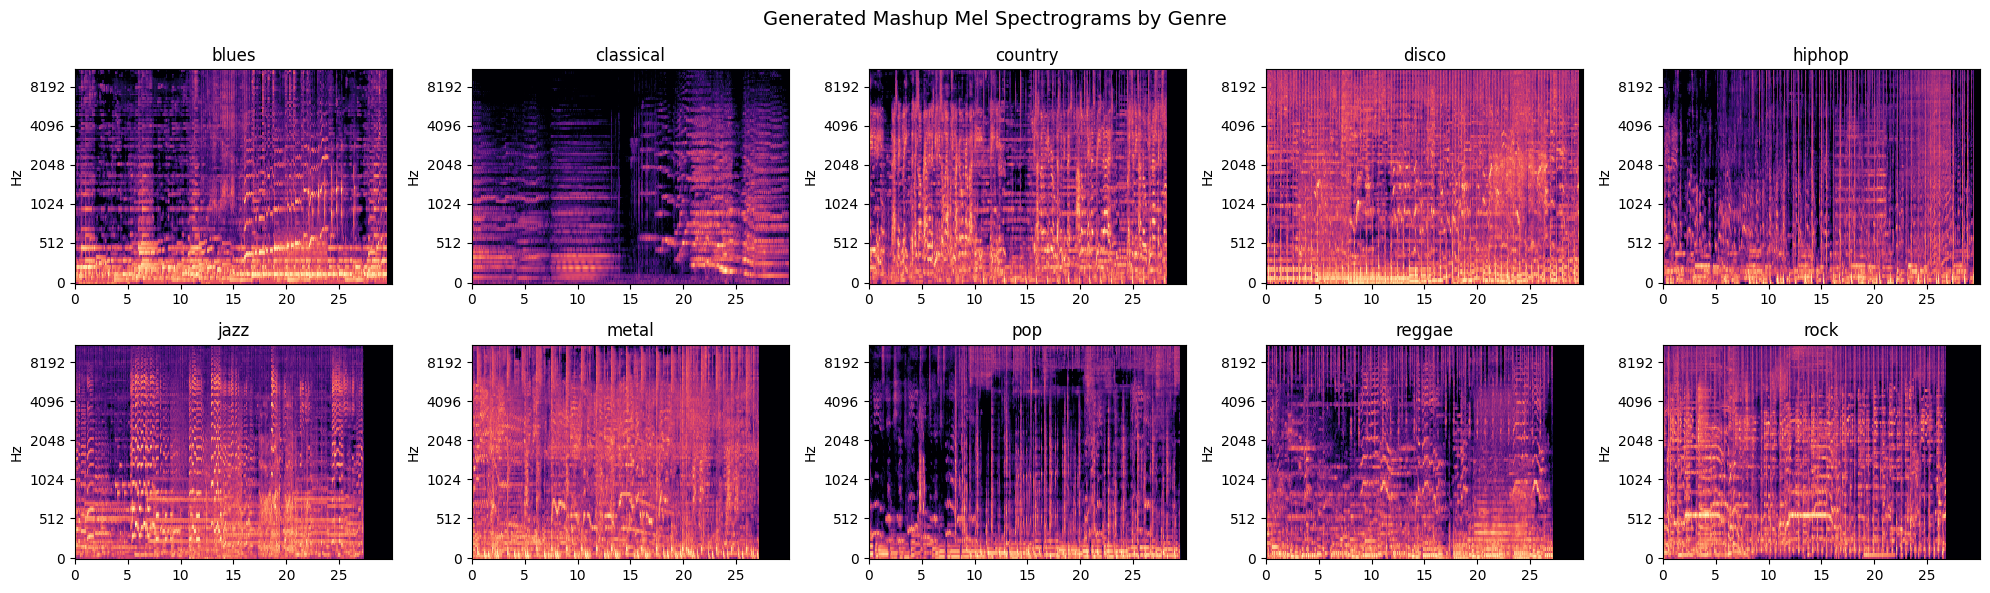


COMPARING GENERATED vs REAL TEST FEATURES

Feature comparison (Generated vs Real Test):
Metric                       Generated    Real Test      Ratio
------------------------------------------------------------
zcr                             0.1163       0.1087       0.93
spectral_flatness               0.0793       0.0234       0.30
spectral_centroid            2180.2140    2321.6573       1.06

✅ Mashup generator validated!

Mel spectrogram shape: (128, 1292)
This will be our model input shape: (1, 128, 1292)


In [5]:
# Cell 5: Complete Training Data Pipeline with Aggressive Augmentation
import os
import numpy as np
import pandas as pd
import librosa
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# For saving/loading
import pickle
import gc

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("BUILDING TRAINING DATA PIPELINE")
print("=" * 60)

# Configuration
CONFIG = {
    'sr': 22050,
    'duration': 30,  # seconds
    'n_mels': 128,
    'n_fft': 2048,
    'hop_length': 512,
    'fmin': 20,
    'fmax': 8000,
    
    # Augmentation parameters (AGGRESSIVE based on our analysis)
    'noise_intensity_range': (0.05, 0.35),  # Increased based on spectral flatness gap
    'num_noise_samples': (1, 4),
    'tempo_stretch_range': (0.85, 1.15),
    'volume_range': (0.4, 1.0),
    'pitch_shift_range': (-2, 2),  # semitones
}

print(f"\nConfiguration:")
for k, v in CONFIG.items():
    print(f"  {k}: {v}")

# Load metadata
genres_path = os.path.join(BASE_PATH, 'genres_stems')
esc_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')
esc_meta = pd.read_csv(os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv'))

GENRES = sorted(os.listdir(genres_path))
GENRE_TO_IDX = {g: i for i, g in enumerate(GENRES)}
IDX_TO_GENRE = {i: g for g, i in GENRE_TO_IDX.items()}

print(f"\nGenres: {GENRES}")
print(f"Genre mapping: {GENRE_TO_IDX}")

# Build index of all training stems
print("\n" + "=" * 60)
print("INDEXING TRAINING DATA")
print("=" * 60)

training_index = []
for genre in GENRES:
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))
    for song in songs:
        song_path = os.path.join(genre_path, song)
        stems = {}
        for stem_type in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
            stem_path = os.path.join(song_path, stem_type)
            if os.path.exists(stem_path):
                stems[stem_type.replace('.wav', '')] = stem_path
        
        training_index.append({
            'genre': genre,
            'genre_idx': GENRE_TO_IDX[genre],
            'song': song,
            'stems': stems
        })

print(f"Total songs indexed: {len(training_index)}")
print(f"Songs per genre: {len(training_index) // len(GENRES)}")

# Index noise files
noise_files = [os.path.join(esc_path, f) for f in esc_meta['filename'].tolist()]
print(f"Total noise files: {len(noise_files)}")

# ============================================================
# MASHUP GENERATOR CLASS
# ============================================================
class MashupGenerator:
    def __init__(self, training_index, noise_files, config):
        self.training_index = training_index
        self.noise_files = noise_files
        self.config = config
        
        # Group songs by genre for efficient sampling
        self.songs_by_genre = {}
        for item in training_index:
            genre = item['genre']
            if genre not in self.songs_by_genre:
                self.songs_by_genre[genre] = []
            self.songs_by_genre[genre].append(item)
    
    def load_stem(self, path):
        """Load a single stem file"""
        y, _ = librosa.load(path, sr=self.config['sr'], mono=True, 
                           duration=self.config['duration'])
        return y
    
    def apply_augmentation(self, y):
        """Apply random augmentations to audio"""
        # Time stretch
        if random.random() > 0.3:
            rate = random.uniform(*self.config['tempo_stretch_range'])
            y = librosa.effects.time_stretch(y, rate=rate)
        
        # Pitch shift
        if random.random() > 0.5:
            steps = random.uniform(*self.config['pitch_shift_range'])
            y = librosa.effects.pitch_shift(y, sr=self.config['sr'], n_steps=steps)
        
        # Volume adjustment
        volume = random.uniform(*self.config['volume_range'])
        y = y * volume
        
        return y
    
    def add_noise(self, y):
        """Add random noise samples from ESC-50"""
        num_noises = random.randint(*self.config['num_noise_samples'])
        
        for _ in range(num_noises):
            noise_path = random.choice(self.noise_files)
            noise, _ = librosa.load(noise_path, sr=self.config['sr'], mono=True)
            
            # Random intensity (AGGRESSIVE)
            intensity = random.uniform(*self.config['noise_intensity_range'])
            noise = noise * intensity
            
            # Random position
            if len(noise) < len(y):
                # Random start position
                start = random.randint(0, max(0, len(y) - len(noise)))
                y[start:start + len(noise)] += noise
            else:
                # Loop or truncate noise
                y += np.tile(noise, (len(y) // len(noise) + 1))[:len(y)]
        
        return y
    
    def generate_mashup(self, genre, num_songs=4):
        """Generate a synthetic mashup from stems of different songs"""
        songs = random.sample(self.songs_by_genre[genre], 
                             min(num_songs, len(self.songs_by_genre[genre])))
        
        stem_types = ['drums', 'vocals', 'bass', 'other']
        mixed = None
        
        for i, stem_type in enumerate(stem_types):
            song = songs[i % len(songs)]
            if stem_type in song['stems']:
                stem = self.load_stem(song['stems'][stem_type])
                stem = self.apply_augmentation(stem)
                
                if mixed is None:
                    mixed = stem
                else:
                    min_len = min(len(mixed), len(stem))
                    mixed = mixed[:min_len] + stem[:min_len]
        
        # Normalize before noise
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
        
        # Add noise
        mixed = self.add_noise(mixed)
        
        # Final normalization
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
        
        # Random duration (matching test distribution)
        target_samples = int(self.config['sr'] * self.config['duration'])
        if len(mixed) > target_samples:
            # Random crop
            start = random.randint(0, len(mixed) - target_samples)
            mixed = mixed[start:start + target_samples]
        else:
            # Pad with zeros
            mixed = np.pad(mixed, (0, target_samples - len(mixed)))
        
        return mixed
    
    def generate_from_single_song(self, song_item, add_noise=True):
        """Generate from combining stems of a single song (simpler augmentation)"""
        mixed = None
        
        for stem_type in ['drums', 'vocals', 'bass', 'other']:
            if stem_type in song_item['stems']:
                stem = self.load_stem(song_item['stems'][stem_type])
                
                if random.random() > 0.5:
                    stem = self.apply_augmentation(stem)
                
                if mixed is None:
                    mixed = stem
                else:
                    min_len = min(len(mixed), len(stem))
                    mixed = mixed[:min_len] + stem[:min_len]
        
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
        
        if add_noise:
            mixed = self.add_noise(mixed)
        
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
        
        # Ensure correct length
        target_samples = int(self.config['sr'] * self.config['duration'])
        if len(mixed) > target_samples:
            start = random.randint(0, len(mixed) - target_samples)
            mixed = mixed[start:start + target_samples]
        else:
            mixed = np.pad(mixed, (0, target_samples - len(mixed)))
        
        return mixed
    
    def audio_to_melspec(self, y):
        """Convert audio to mel spectrogram"""
        S = librosa.feature.melspectrogram(
            y=y, 
            sr=self.config['sr'],
            n_mels=self.config['n_mels'],
            n_fft=self.config['n_fft'],
            hop_length=self.config['hop_length'],
            fmin=self.config['fmin'],
            fmax=self.config['fmax']
        )
        S_db = librosa.power_to_db(S, ref=np.max)
        return S_db

# Create generator
generator = MashupGenerator(training_index, noise_files, CONFIG)

# ============================================================
# TEST THE GENERATOR
# ============================================================
print("\n" + "=" * 60)
print("TESTING MASHUP GENERATOR")
print("=" * 60)

# Generate sample mashups and check their properties
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 6))

for idx, genre in enumerate(GENRES):
    # Generate mashup
    mashup = generator.generate_mashup(genre)
    melspec = generator.audio_to_melspec(mashup)
    
    # Display mel spectrogram
    ax = axes[idx // 5, idx % 5]
    librosa.display.specshow(melspec, sr=CONFIG['sr'], 
                             hop_length=CONFIG['hop_length'],
                             x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f'{genre}')
    ax.set_xlabel('')
    
    # Print stats
    rms = np.mean(librosa.feature.rms(y=mashup))
    zcr = np.mean(librosa.feature.zero_crossing_rate(mashup))
    sf = np.mean(librosa.feature.spectral_flatness(y=mashup))
    print(f"{genre:12s} - RMS: {rms:.4f}, ZCR: {zcr:.4f}, Spectral Flatness: {sf:.4f}")

plt.suptitle('Generated Mashup Mel Spectrograms by Genre', fontsize=14)
plt.tight_layout()
plt.savefig('generated_mashups_by_genre.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# COMPARE WITH REAL TEST DATA
# ============================================================
print("\n" + "=" * 60)
print("COMPARING GENERATED vs REAL TEST FEATURES")
print("=" * 60)

# Generate multiple samples and compute average features
gen_features = {'zcr': [], 'spectral_flatness': [], 'spectral_centroid': []}

for _ in range(30):  # 30 samples
    genre = random.choice(GENRES)
    mashup = generator.generate_mashup(genre)
    gen_features['zcr'].append(np.mean(librosa.feature.zero_crossing_rate(mashup)))
    gen_features['spectral_flatness'].append(np.mean(librosa.feature.spectral_flatness(y=mashup)))
    gen_features['spectral_centroid'].append(np.mean(librosa.feature.spectral_centroid(y=mashup, sr=CONFIG['sr'])))

# Load real test samples
mashups_path = os.path.join(BASE_PATH, 'mashups')
real_features = {'zcr': [], 'spectral_flatness': [], 'spectral_centroid': []}

test_files = random.sample(os.listdir(mashups_path), 30)
for f in test_files:
    y, _ = librosa.load(os.path.join(mashups_path, f), sr=CONFIG['sr'], mono=True)
    real_features['zcr'].append(np.mean(librosa.feature.zero_crossing_rate(y)))
    real_features['spectral_flatness'].append(np.mean(librosa.feature.spectral_flatness(y=y)))
    real_features['spectral_centroid'].append(np.mean(librosa.feature.spectral_centroid(y=y, sr=CONFIG['sr'])))

print("\nFeature comparison (Generated vs Real Test):")
print(f"{'Metric':<25} {'Generated':>12} {'Real Test':>12} {'Ratio':>10}")
print("-" * 60)
for key in gen_features.keys():
    gen_mean = np.mean(gen_features[key])
    real_mean = np.mean(real_features[key])
    ratio = real_mean / (gen_mean + 1e-10)
    print(f"{key:<25} {gen_mean:>12.4f} {real_mean:>12.4f} {ratio:>10.2f}")

print("\n✅ Mashup generator validated!")
print(f"\nMel spectrogram shape: {melspec.shape}")
print(f"This will be our model input shape: (1, {melspec.shape[0]}, {melspec.shape[1]})")

# Complete (Model + data + precompute)

In [6]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.cuda.amp import autocast, GradScaler
import torchaudio
import torchaudio.transforms as T
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*60, flush=True)
print("CELL 6: SETUP + MODELS + DATA", flush=True)
print("="*60, flush=True)

# ============================================================
# CONFIG
# ============================================================
CONFIG = {
    # Audio
    'sr': 22050,  # Match test sample rate!
    'duration': 30,
    'n_mels': 128,
    'n_fft': 2048,
    'hop_length': 512,
    'fmin': 20,
    'fmax': 11025,
    
    # Augmentation - AGGRESSIVE (match test noise)
    'noise_intensity_range': (0.15, 0.6),  # Higher!
    'num_noise_samples': (2, 5),
    'volume_range': (0.3, 1.0),
    
    # SpecAugment
    'freq_mask_param': 12,
    'time_mask_param': 100,
    'num_freq_masks': 2,
    'num_time_masks': 2,
    
    # Training
    'batch_size': 32,
    'num_epochs': 25,
    'learning_rate': 2e-4,
    'weight_decay': 1e-5,
    'num_mashups_per_song': 10,
    'val_split': 0.15,
    'num_classes': 10,
    'patience': 8,
    
    # Pseudo-labeling
    'pseudo_threshold': 0.95,  # High confidence only
    'pseudo_iterations': 3,
    
    # Ensemble
    'num_ensemble_models': 3,
    'tta_passes': 7,
    
    # Paths
    'data_root': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup',
    'train_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/genres_stems',
    'test_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/mashups',
    'noise_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio',
    'weights_path': '/kaggle/input/pretrained-audio-neural-networks/Cnn14_mAP0.431.pth',
}

GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']
GENRE_TO_IDX = {g: i for i, g in enumerate(GENRES)}
IDX_TO_GENRE = {i: g for g, i in GENRE_TO_IDX.items()}

# ============================================================
# SEED
# ============================================================
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

set_seed(42)

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_gpus = torch.cuda.device_count()
print(f"Device: {device}, GPUs: {n_gpus}", flush=True)

# ============================================================
# MODEL 1: PANNs CNN14
# ============================================================
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        x = F.relu_(self.bn1(self.conv1(x)))
        x = F.relu_(self.bn2(self.conv2(x)))
        x = F.avg_pool2d(x, kernel_size=2)
        return x

class Cnn14(nn.Module):
    def __init__(self, num_classes=10, pretrained_path=None):
        super().__init__()
        self.bn0 = nn.BatchNorm2d(CONFIG['n_mels'])
        self.conv_block1 = ConvBlock(1, 64)
        self.conv_block2 = ConvBlock(64, 128)
        self.conv_block3 = ConvBlock(128, 256)
        self.conv_block4 = ConvBlock(256, 512)
        self.conv_block5 = ConvBlock(512, 1024)
        self.conv_block6 = ConvBlock(1024, 2048)
        self.fc1 = nn.Linear(2048, 2048)
        self.dropout = nn.Dropout(0.3)
        self.fc_out = nn.Linear(2048, num_classes)
        
        if pretrained_path and os.path.exists(pretrained_path):
            self._load_pretrained(pretrained_path)
    
    def _load_pretrained(self, path):
        try:
            checkpoint = torch.load(path, map_location='cpu', weights_only=False)
            state_dict = checkpoint['model'] if 'model' in checkpoint else checkpoint
            
            model_dict = self.state_dict()
            pretrained_dict = {}
            for k, v in state_dict.items():
                if k in model_dict and v.shape == model_dict[k].shape:
                    pretrained_dict[k] = v
            
            model_dict.update(pretrained_dict)
            self.load_state_dict(model_dict, strict=False)
            print(f"  Loaded {len(pretrained_dict)}/{len(model_dict)} pretrained weights", flush=True)
        except Exception as e:
            print(f"  Could not load pretrained: {e}", flush=True)
    
    def forward(self, x):
        # x: (batch, 1, time, mel)
        x = x.transpose(1, 2)  # (batch, mel, time, 1)
        x = self.bn0(x)
        x = x.transpose(1, 2)  # (batch, 1, time, mel)
        
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.conv_block5(x)
        x = self.conv_block6(x)
        
        x = torch.mean(x, dim=3)  # (batch, 2048, time')
        x, _ = torch.max(x, dim=2)  # (batch, 2048)
        
        x = F.relu_(self.fc1(x))
        x = self.dropout(x)
        x = self.fc_out(x)
        return x

# ============================================================
# MODEL 2: EfficientNet-style CNN (lighter, different inductive bias)
# ============================================================
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.fc1 = nn.Linear(channels, channels // reduction)
        self.fc2 = nn.Linear(channels // reduction, channels)
    
    def forward(self, x):
        b, c, _, _ = x.shape
        y = x.view(b, c, -1).mean(dim=2)
        y = F.relu(self.fc1(y))
        y = torch.sigmoid(self.fc2(y))
        return x * y.view(b, c, 1, 1)

class EfficientCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.se2 = SEBlock(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.se4 = SEBlock(256)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), 2)
        x = F.max_pool2d(self.se2(F.relu(self.bn2(self.conv2(x)))), 2)
        x = F.max_pool2d(F.relu(self.bn3(self.conv3(x))), 2)
        x = F.max_pool2d(self.se4(F.relu(self.bn4(self.conv4(x)))), 2)
        x = F.max_pool2d(F.relu(self.bn5(self.conv5(x))), 2)
        
        x = self.global_pool(x).flatten(1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# ============================================================
# MODEL 3: ResNet-style with residual connections
# ============================================================
class ResBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(channels)
        self.conv2 = nn.Conv2d(channels, channels, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(channels)
    
    def forward(self, x):
        residual = x
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x = F.relu(x + residual)
        return x

class ResNetAudio(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(3, stride=2, padding=1)
        
        self.layer1 = nn.Sequential(ResBlock(64), ResBlock(64))
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.layer2 = nn.Sequential(ResBlock(128), ResBlock(128))
        self.conv3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.layer3 = nn.Sequential(ResBlock(256), ResBlock(256))
        self.conv4 = nn.Conv2d(256, 512, 3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.layer1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.layer2(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.layer3(x)
        x = F.relu(self.bn4(self.conv4(x)))
        
        x = self.global_pool(x).flatten(1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# ============================================================
# MASHUP CREATION - REVERSE ENGINEERED TO MATCH TEST
# ============================================================
class MashupCreator:
    """
    Creates mashups that match test distribution:
    - 22050 Hz sample rate
    - Mono
    - Variable duration (15-30s)
    - High noise (spectral flatness ~0.053)
    """
    def __init__(self, stems_dict, noise_files, config):
        self.stems_dict = stems_dict
        self.noise_files = noise_files
        self.config = config
        self.sr = config['sr']
        self.duration = config['duration']
        self.target_samples = self.sr * self.duration
    
    def load_audio(self, path):
        try:
            waveform, sr = torchaudio.load(path)
            # Convert to mono
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)
            # Resample to target sr
            if sr != self.sr:
                resampler = T.Resample(sr, self.sr)
                waveform = resampler(waveform)
            return waveform.squeeze(0).numpy()
        except:
            return np.zeros(self.target_samples)
    
    def load_noise(self, path):
        try:
            waveform, sr = torchaudio.load(path)
            if waveform.shape[0] > 1:
                waveform = waveform.mean(dim=0, keepdim=True)
            if sr != self.sr:
                resampler = T.Resample(sr, self.sr)
                waveform = resampler(waveform)
            return waveform.squeeze(0).numpy()
        except:
            return np.zeros(self.sr * 5)
    
    def create_mashup(self, genre, song_stems):
        """
        Create a mashup matching test characteristics
        """
        # Randomly select 2-4 stems (not always all 4)
        stem_names = list(song_stems.keys())
        num_stems = random.randint(2, len(stem_names))
        selected_stems = random.sample(stem_names, num_stems)
        
        # Load and mix stems
        mixed = np.zeros(self.target_samples)
        for stem_name in selected_stems:
            audio = self.load_audio(song_stems[stem_name])
            vol = random.uniform(*self.config['volume_range'])
            
            # Pad or crop
            if len(audio) < self.target_samples:
                audio = np.pad(audio, (0, self.target_samples - len(audio)))
            else:
                start = random.randint(0, len(audio) - self.target_samples)
                audio = audio[start:start + self.target_samples]
            
            mixed += audio * vol
        
        # Add multiple noise samples (key for matching test!)
        num_noises = random.randint(*self.config['num_noise_samples'])
        noise_intensity = random.uniform(*self.config['noise_intensity_range'])
        
        for _ in range(num_noises):
            noise_path = random.choice(self.noise_files)
            noise = self.load_noise(noise_path)
            
            # Tile noise to match duration
            if len(noise) < self.target_samples:
                reps = int(np.ceil(self.target_samples / len(noise)))
                noise = np.tile(noise, reps)
            
            # Random crop and position
            start = random.randint(0, len(noise) - self.target_samples)
            noise = noise[start:start + self.target_samples]
            
            # Random offset in the mix
            offset = random.randint(0, self.target_samples // 4)
            noise = np.roll(noise, offset)
            
            mixed += noise * noise_intensity * random.uniform(0.5, 1.5)
        
        # Normalize
        max_val = np.abs(mixed).max()
        if max_val > 0:
            mixed = mixed / max_val * 0.9
        
        return mixed.astype(np.float32)

# ============================================================
# DATASET
# ============================================================
class MashupDataset(Dataset):
    def __init__(self, spectrograms, labels, augment=False, config=None):
        self.spectrograms = spectrograms
        self.labels = labels
        self.augment = augment
        self.config = config
        
        if augment and config:
            self.freq_mask = T.FrequencyMasking(config['freq_mask_param'])
            self.time_mask = T.TimeMasking(config['time_mask_param'])
    
    def __len__(self):
        return len(self.spectrograms)
    
    def __getitem__(self, idx):
        spec = self.spectrograms[idx].copy()
        label = self.labels[idx]
        
        # SpecAugment
        if self.augment and self.config:
            spec_tensor = torch.from_numpy(spec).unsqueeze(0)
            for _ in range(self.config['num_freq_masks']):
                spec_tensor = self.freq_mask(spec_tensor)
            for _ in range(self.config['num_time_masks']):
                spec_tensor = self.time_mask(spec_tensor)
            spec = spec_tensor.squeeze(0).numpy()
        
        spec = torch.from_numpy(spec).unsqueeze(0)  # (1, mel, time)
        return spec, label

class TestDataset(Dataset):
    def __init__(self, spectrograms):
        self.spectrograms = spectrograms
    
    def __len__(self):
        return len(self.spectrograms)
    
    def __getitem__(self, idx):
        spec = torch.from_numpy(self.spectrograms[idx]).unsqueeze(0)
        return spec

# ============================================================
# LOAD DATA
# ============================================================
print("\n📂 Loading stems...", flush=True)
stems_dict = {}
for genre in GENRES:
    genre_path = os.path.join(CONFIG['train_dir'], genre)
    if not os.path.exists(genre_path):
        continue
    
    for song_folder in os.listdir(genre_path):
        song_path = os.path.join(genre_path, song_folder)
        if not os.path.isdir(song_path):
            continue
        
        stems = {}
        for stem_file in os.listdir(song_path):
            if stem_file.endswith('.wav'):
                stem_name = stem_file.replace('.wav', '')
                stems[stem_name] = os.path.join(song_path, stem_file)
        
        if stems:
            stems_dict[(genre, song_folder)] = stems

print(f"   Loaded {len(stems_dict)} songs", flush=True)

print("\n📂 Loading noise files...", flush=True)
noise_files = []
noise_dir = CONFIG['noise_dir']
if os.path.exists(noise_dir):
    for f in os.listdir(noise_dir):
        if f.endswith('.wav'):
            noise_files.append(os.path.join(noise_dir, f))
print(f"   Loaded {len(noise_files)} noise files", flush=True)

# ============================================================
# CREATE MASHUPS & SPECTROGRAMS
# ============================================================
print("\n🎵 Creating mashups and spectrograms...", flush=True)

mashup_creator = MashupCreator(stems_dict, noise_files, CONFIG)
mel_transform = T.MelSpectrogram(
    sample_rate=CONFIG['sr'],
    n_fft=CONFIG['n_fft'],
    hop_length=CONFIG['hop_length'],
    n_mels=CONFIG['n_mels'],
    f_min=CONFIG['fmin'],
    f_max=CONFIG['fmax']
)
db_transform = T.AmplitudeToDB(top_db=80)

def audio_to_spectrogram(audio):
    waveform = torch.from_numpy(audio).unsqueeze(0)
    mel = mel_transform(waveform)
    mel_db = db_transform(mel)
    return mel_db.squeeze(0).numpy()

# Create training data
all_specs = []
all_labels = []

song_items = list(stems_dict.items())
total = len(song_items) * CONFIG['num_mashups_per_song']

for idx, ((genre, song_folder), stems) in enumerate(song_items):
    label = GENRE_TO_IDX[genre]
    
    for m in range(CONFIG['num_mashups_per_song']):
        mashup = mashup_creator.create_mashup(genre, stems)
        spec = audio_to_spectrogram(mashup)
        all_specs.append(spec)
        all_labels.append(label)
    
    processed = (idx + 1) * CONFIG['num_mashups_per_song']
    if processed % 500 == 0 or idx == len(song_items) - 1:
        print(f"   Processed: {processed}/{total} ({100*processed/total:.1f}%)", flush=True)

all_specs = np.array(all_specs)
all_labels = np.array(all_labels)
print(f"   Total samples: {len(all_specs)}", flush=True)
print(f"   Spectrogram shape: {all_specs[0].shape}", flush=True)

# ============================================================
# TRAIN/VAL SPLIT
# ============================================================
X_train, X_val, y_train, y_val = train_test_split(
    all_specs, all_labels, 
    test_size=CONFIG['val_split'], 
    stratify=all_labels, 
    random_state=42
)
print(f"\n📊 Train: {len(X_train)}, Val: {len(X_val)}", flush=True)

# ============================================================
# LOAD TEST DATA
# ============================================================
print("\n📂 Loading test data...", flush=True)
test_df = pd.read_csv(os.path.join(CONFIG['data_root'], 'test.csv'))

test_specs = []
for idx, row in test_df.iterrows():
    filename = row['filename']
    if not filename.startswith('mashups/'):
        filepath = os.path.join(CONFIG['test_dir'], filename)
    else:
        filepath = os.path.join(CONFIG['data_root'], filename)
    
    try:
        waveform, sr = torchaudio.load(filepath)
        if waveform.shape[0] > 1:
            waveform = waveform.mean(dim=0, keepdim=True)
        if sr != CONFIG['sr']:
            resampler = T.Resample(sr, CONFIG['sr'])
            waveform = resampler(waveform)
        
        # Pad/crop to target length
        target_len = CONFIG['sr'] * CONFIG['duration']
        if waveform.shape[1] < target_len:
            waveform = F.pad(waveform, (0, target_len - waveform.shape[1]))
        else:
            waveform = waveform[:, :target_len]
        
        mel = mel_transform(waveform)
        mel_db = db_transform(mel)
        test_specs.append(mel_db.squeeze(0).numpy())
    except Exception as e:
        print(f"   Error loading {filepath}: {e}", flush=True)
        test_specs.append(np.zeros((CONFIG['n_mels'], 1 + CONFIG['sr'] * CONFIG['duration'] // CONFIG['hop_length'])))
    
    if (idx + 1) % 500 == 0:
        print(f"   Test: {idx+1}/{len(test_df)}", flush=True)

test_specs = np.array(test_specs)
print(f"   Test samples: {len(test_specs)}", flush=True)

print("\n" + "="*60, flush=True)
print("✅ CELL 6 COMPLETE", flush=True)
print("="*60, flush=True)

CELL 6: SETUP + MODELS + DATA
Device: cuda, GPUs: 1

📂 Loading stems...
   Loaded 1000 songs

📂 Loading noise files...
   Loaded 2000 noise files

🎵 Creating mashups and spectrograms...
   Processed: 500/10000 (5.0%)
   Processed: 1000/10000 (10.0%)
   Processed: 1500/10000 (15.0%)
   Processed: 2000/10000 (20.0%)
   Processed: 2500/10000 (25.0%)
   Processed: 3000/10000 (30.0%)
   Processed: 3500/10000 (35.0%)
   Processed: 4000/10000 (40.0%)
   Processed: 4500/10000 (45.0%)
   Processed: 5000/10000 (50.0%)
   Processed: 5500/10000 (55.0%)
   Processed: 6000/10000 (60.0%)
   Processed: 6500/10000 (65.0%)
   Processed: 7000/10000 (70.0%)
   Processed: 7500/10000 (75.0%)
   Processed: 8000/10000 (80.0%)
   Processed: 8500/10000 (85.0%)
   Processed: 9000/10000 (90.0%)
   Processed: 9500/10000 (95.0%)
   Processed: 10000/10000 (100.0%)
   Total samples: 10000
   Spectrogram shape: (128, 1292)

📊 Train: 8500, Val: 1500

📂 Loading test data...
   Test: 500/3020
   Test: 1000/3020
   Test: 

# Training + Pseudo-labeling + Ensemble + Inference

In [7]:
print("="*60, flush=True)
print("CELL 7: TRAINING + PSEUDO-LABELING + ENSEMBLE", flush=True)
print("="*60, flush=True)

# ============================================================
# TRAINING UTILITIES
# ============================================================
def mixup_data(x, y, alpha=0.3):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

def train_single_model(model, train_loader, val_loader, model_name, config, device):
    """Train a single model"""
    
    # NO torch.compile - causes DataParallel issues
    if n_gpus > 1:
        model = nn.DataParallel(model)
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = torch.optim.AdamW(
        model.parameters(), 
        lr=config['learning_rate'],
        weight_decay=config['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=config['learning_rate'],
        epochs=config['num_epochs'],
        steps_per_epoch=len(train_loader)
    )
    scaler = GradScaler()
    
    best_f1 = 0
    patience_counter = 0
    best_state = None
    
    for epoch in range(config['num_epochs']):
        # Training
        model.train()
        train_loss = 0
        train_preds, train_labels = [], []
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            # Mixup
            data, y_a, y_b, lam = mixup_data(data, target, alpha=0.3)
            
            optimizer.zero_grad()
            with autocast():
                output = model(data)
                loss = mixup_criterion(criterion, output, y_a, y_b, lam)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            
            train_loss += loss.item()
            preds = output.argmax(dim=1).cpu().numpy()
            train_preds.extend(preds)
            train_labels.extend(y_a.cpu().numpy())
            
            if (batch_idx + 1) % 50 == 0:
                print(f"   [{model_name}] Epoch {epoch+1} Batch {batch_idx+1}/{len(train_loader)}", flush=True)
        
        train_f1 = f1_score(train_labels, train_preds, average='macro')
        
        # Validation
        model.eval()
        val_preds, val_labels = [], []
        
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                with autocast():
                    output = model(data)
                preds = output.argmax(dim=1).cpu().numpy()
                val_preds.extend(preds)
                val_labels.extend(target.numpy())
        
        val_f1 = f1_score(val_labels, val_preds, average='macro')
        
        print(f"   [{model_name}] Epoch {epoch+1}: Train F1={train_f1:.4f}, Val F1={val_f1:.4f}", flush=True)
        
        # Save best
        if val_f1 > best_f1:
            best_f1 = val_f1
            patience_counter = 0
            model_to_save = model.module if hasattr(model, 'module') else model
            best_state = {k: v.cpu().clone() for k, v in model_to_save.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= config['patience']:
                print(f"   [{model_name}] Early stopping at epoch {epoch+1}", flush=True)
                break
    
    # Restore best
    model_to_load = model.module if hasattr(model, 'module') else model
    model_to_load.load_state_dict(best_state)
    
    return model, best_f1

# ============================================================
# PSEUDO-LABELING
# ============================================================
def get_pseudo_labels(models, test_loader, device, threshold=0.95):
    """Get high-confidence pseudo labels from ensemble"""
    all_probs = []
    
    for model in models:
        model.eval()
        model_probs = []
        
        with torch.no_grad():
            for data in test_loader:
                if isinstance(data, (list, tuple)):
                    data = data[0]
                data = data.to(device)
                with autocast():
                    output = model(data)
                probs = F.softmax(output, dim=1).cpu().numpy()
                model_probs.append(probs)
        
        all_probs.append(np.vstack(model_probs))
    
    # Average probabilities
    avg_probs = np.mean(all_probs, axis=0)
    max_probs = avg_probs.max(axis=1)
    predictions = avg_probs.argmax(axis=1)
    
    # Filter high confidence
    high_conf_mask = max_probs >= threshold
    high_conf_indices = np.where(high_conf_mask)[0]
    high_conf_labels = predictions[high_conf_mask]
    
    print(f"   Pseudo-labels: {len(high_conf_indices)}/{len(predictions)} above {threshold} threshold", flush=True)
    
    return high_conf_indices, high_conf_labels, avg_probs

# ============================================================
# PHASE 1: TRAIN ENSEMBLE
# ============================================================
print("\n🏋️ PHASE 1: Training Ensemble Models", flush=True)

# Create data loaders
train_dataset = MashupDataset(X_train, y_train, augment=True, config=CONFIG)
val_dataset = MashupDataset(X_val, y_val, augment=False, config=CONFIG)

train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], 
                          shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'],
                        shuffle=False, num_workers=4, pin_memory=True)

# Train 3 diverse models
ensemble_models = []

print("\n--- Training Model 1: PANNs CNN14 ---", flush=True)
model1 = Cnn14(num_classes=CONFIG['num_classes'], pretrained_path=CONFIG['weights_path'])
model1, f1_1 = train_single_model(model1, train_loader, val_loader, "CNN14", CONFIG, device)
ensemble_models.append(model1)
torch.save(model1.module.state_dict() if hasattr(model1, 'module') else model1.state_dict(), 
           'model1_cnn14.pth')

print("\n--- Training Model 2: EfficientCNN ---", flush=True)
model2 = EfficientCNN(num_classes=CONFIG['num_classes'])
model2, f1_2 = train_single_model(model2, train_loader, val_loader, "EffCNN", CONFIG, device)
ensemble_models.append(model2)
torch.save(model2.module.state_dict() if hasattr(model2, 'module') else model2.state_dict(),
           'model2_effcnn.pth')

print("\n--- Training Model 3: ResNetAudio ---", flush=True)
model3 = ResNetAudio(num_classes=CONFIG['num_classes'])
model3, f1_3 = train_single_model(model3, train_loader, val_loader, "ResNet", CONFIG, device)
ensemble_models.append(model3)
torch.save(model3.module.state_dict() if hasattr(model3, 'module') else model3.state_dict(),
           'model3_resnet.pth')

print(f"\n📊 Ensemble Val F1s: {f1_1:.4f}, {f1_2:.4f}, {f1_3:.4f}", flush=True)

# ============================================================
# PHASE 2: PSEUDO-LABELING ITERATIONS
# ============================================================
print("\n🔄 PHASE 2: Pseudo-labeling iterations", flush=True)

test_dataset = TestDataset(test_specs)
test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'],
                         shuffle=False, num_workers=4, pin_memory=True)

for iteration in range(CONFIG['pseudo_iterations']):
    print(f"\n--- Pseudo-labeling iteration {iteration + 1}/{CONFIG['pseudo_iterations']} ---", flush=True)
    
    # Get pseudo labels from current ensemble
    high_conf_idx, high_conf_labels, _ = get_pseudo_labels(
        ensemble_models, test_loader, device, CONFIG['pseudo_threshold']
    )
    
    if len(high_conf_idx) < 100:
        print("   Too few high-confidence samples, skipping iteration", flush=True)
        continue
    
    # Add pseudo-labeled data to training
    pseudo_specs = test_specs[high_conf_idx]
    X_train_aug = np.concatenate([X_train, pseudo_specs], axis=0)
    y_train_aug = np.concatenate([y_train, high_conf_labels], axis=0)
    
    print(f"   Training set expanded: {len(X_train)} → {len(X_train_aug)}", flush=True)
    
    # Retrain best model (CNN14) with augmented data
    train_dataset_aug = MashupDataset(X_train_aug, y_train_aug, augment=True, config=CONFIG)
    train_loader_aug = DataLoader(train_dataset_aug, batch_size=CONFIG['batch_size'],
                                  shuffle=True, num_workers=4, pin_memory=True)
    
    # Reduce epochs for pseudo-labeling iterations
    config_pseudo = CONFIG.copy()
    config_pseudo['num_epochs'] = 15
    config_pseudo['patience'] = 5
    
    # Retrain CNN14
    model1_new = Cnn14(num_classes=CONFIG['num_classes'], pretrained_path=CONFIG['weights_path'])
    model1_new, f1_new = train_single_model(
        model1_new, train_loader_aug, val_loader, f"CNN14_PL{iteration+1}", config_pseudo, device
    )
    
    # Update ensemble
    ensemble_models[0] = model1_new
    print(f"   Updated CNN14 Val F1: {f1_new:.4f}", flush=True)

# ============================================================
# PHASE 3: FINAL ENSEMBLE INFERENCE WITH TTA
# ============================================================
print("\n🎯 PHASE 3: Final Ensemble Inference with TTA", flush=True)

def tta_predict(model, spec, device, n_passes=7):
    """Test-time augmentation"""
    model.eval()
    preds = []
    
    freq_mask = T.FrequencyMasking(CONFIG['freq_mask_param'])
    time_mask = T.TimeMasking(CONFIG['time_mask_param'])
    
    with torch.no_grad():
        for i in range(n_passes):
            spec_aug = spec.clone()
            
            if i > 0:  # First pass is clean
                spec_aug = freq_mask(spec_aug)
                spec_aug = time_mask(spec_aug)
            
            spec_aug = spec_aug.to(device)
            with autocast():
                output = model(spec_aug.unsqueeze(0))
            probs = F.softmax(output, dim=1).cpu().numpy()
            preds.append(probs)
    
    return np.mean(preds, axis=0)

# Final predictions
all_predictions = []
n_test = len(test_specs)

for idx in range(n_test):
    spec = torch.from_numpy(test_specs[idx]).unsqueeze(0)  # (1, mel, time)
    
    ensemble_probs = []
    for model in ensemble_models:
        probs = tta_predict(model, spec, device, CONFIG['tta_passes'])
        ensemble_probs.append(probs)
    
    # Average across models
    final_probs = np.mean(ensemble_probs, axis=0)
    pred = final_probs.argmax()
    all_predictions.append(pred)
    
    if (idx + 1) % 200 == 0:
        print(f"   Inference: {idx+1}/{n_test} ({100*(idx+1)/n_test:.1f}%)", flush=True)

# ============================================================
# CREATE SUBMISSION
# ============================================================
print("\n📝 Creating submission...", flush=True)

submission = pd.DataFrame({
    'id': test_df['id'],
    'genre': [IDX_TO_GENRE[p] for p in all_predictions]
})
submission.to_csv('submission.csv', index=False)

print(f"\n✅ Submission saved: submission.csv", flush=True)
print(f"   Predictions distribution:", flush=True)
print(submission['genre'].value_counts(), flush=True)

print("\n" + "="*60, flush=True)
print("✅ CELL 7 COMPLETE - SUBMISSION READY", flush=True)
print("="*60, flush=True)

CELL 7: TRAINING + PSEUDO-LABELING + ENSEMBLE

🏋️ PHASE 1: Training Ensemble Models

--- Training Model 1: PANNs CNN14 ---
  Loaded 75/81 pretrained weights
   [CNN14] Epoch 1 Batch 50/266
   [CNN14] Epoch 1 Batch 100/266
   [CNN14] Epoch 1 Batch 150/266
   [CNN14] Epoch 1 Batch 200/266
   [CNN14] Epoch 1 Batch 250/266
   [CNN14] Epoch 1: Train F1=0.0753, Val F1=0.0869
   [CNN14] Epoch 2 Batch 50/266
   [CNN14] Epoch 2 Batch 100/266
   [CNN14] Epoch 2 Batch 150/266
   [CNN14] Epoch 2 Batch 200/266
   [CNN14] Epoch 2 Batch 250/266
   [CNN14] Epoch 2: Train F1=0.1435, Val F1=0.3416
   [CNN14] Epoch 3 Batch 50/266
   [CNN14] Epoch 3 Batch 100/266
   [CNN14] Epoch 3 Batch 150/266
   [CNN14] Epoch 3 Batch 200/266
   [CNN14] Epoch 3 Batch 250/266
   [CNN14] Epoch 3: Train F1=0.2391, Val F1=0.4903
   [CNN14] Epoch 4 Batch 50/266
   [CNN14] Epoch 4 Batch 100/266
   [CNN14] Epoch 4 Batch 150/266
   [CNN14] Epoch 4 Batch 200/266
   [CNN14] Epoch 4 Batch 250/266
   [CNN14] Epoch 4: Train F1=0.295